In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np

In [49]:
filepath = 'Resources/Income by Country.csv'
sugar_file = 'Resources/sugar_per_person_g_per_day.csv'

df = pd.read_csv(filepath)
df_sug = pd.read_csv(sugar_file).rename(columns={'country': 'Country'})


In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np

In [50]:
#Create Merged Data Frame
merged_df = pd.merge(df, df_sug, on="Country", how="inner", suffixes= ("_Income", "_SugarIntake"))
merged_df2 = merged_df.set_index('Country')
merged_df2.head()

1990   1991   1992 1993_Income 1994_Income 1995_Income  \
Country                                                                        
Afghanistan           2193   1841   1739        1208         877        1244   
Albania               4415   3138   2857        3261        3600        4168   
Algeria               9989   9457   9462        9171        8847        8904   
Angola                4139   4528   1737        1704        1304        2858   
Antigua and Barbuda  15749  16439  16475       17300       18021       16842   

                    1996_Income 1997_Income 1998_Income 1999_Income  ...  \
Country                                                              ...   
Afghanistan                1130        1039         967         894  ...   
Albania                    4594        4112        4530        5141  ...   
Algeria                    9069        9099        9502        9596  ...   
Angola                     2826        3335        3269        2952  ...   
Antigua and Barbuda       17665       18401       18943       19230  ...   

                    2004_SugarIntake 2005_SugarIntake 2006_SugarIntake  \
Country                                                                  
Afghanistan                     15.5             18.6             19.7   
Albania                         55.0             58.6             67.2   
Algeria                         84.3             75.5             77.9   
Angola                          39.3             37.1             38.3   
Antigua and Barbuda             93.1             79.7             85.0   

                    2007_SugarIntake 2008_SugarIntake 2009_SugarIntake  \
Country                                                                  
Afghanistan                     20.8             23.4             23.3   
Albania                         75.5            102.0            117.0   
Algeria                         86.7             78.5             85.3   
Angola                          39.5             44.1             40.2   
Antigua and Barbuda             87.3             89.2             87.6   

                    2010_SugarIntake 2011_SugarIntake 2012_SugarIntake  \
Country                                                                  
Afghanistan                     24.3             24.8             25.4   
Albania                        113.0            122.0            129.0   
Algeria                         85.6             74.9             82.8   
Angola                          38.9             40.1             42.7   
Antigua and Barbuda             87.6             79.6             87.9   

                    2013_SugarIntake  
Country                               
Afghanistan                     24.5  
Albania                        131.0  
Algeria                         78.2  
Angola                          44.7  
Antigua and Barbuda             90.1  

[5 rows x 50 columns]

In [107]:
#Collect Income Data for past 10 years

new_income_df = merged_df2[["2003_Income", "2004_Income", "2005_Income", "2006_Income", "2007_Income", "2008_Income", "2009_Income", "2010_Income",
                    "2011_Income", "2012_Income", "2013_Income"]]

#new_income_df.head()

In [52]:
#Change Datatype from Object to Numeric
new_income_df = new_income_df.apply(pd.to_numeric, errors='ignore')
#new_income_df.dtypes

In [106]:
#Find 10 Year Average Income for each Country

transposed_df = new_income_df.T
country_income_avg = transposed_df.mean(axis=0)

#Create Dataframe
country_income_df = pd.DataFrame(country_income_avg)

In [128]:
#Collect Sugar Intake Data for past 10 years 

new_sugar_df = merged_df2[["2003_SugarIntake","2004_SugarIntake", "2005_SugarIntake", "2006_SugarIntake", "2007_SugarIntake", 
                    "2008_SugarIntake", "2009_SugarIntake", "2010_SugarIntake", "2011_SugarIntake", "2012_SugarIntake", "2013_SugarIntake"]]
new_sugar_df.head()


2003_SugarIntake  2004_SugarIntake  2005_SugarIntake  \
Country                                                                     
Afghanistan                      12.2              15.5              18.6   
Albania                          67.0              55.0              58.6   
Algeria                          82.8              84.3              75.5   
Angola                           41.5              39.3              37.1   
Antigua and Barbuda              83.5              93.1              79.7   

                     2006_SugarIntake  2007_SugarIntake  2008_SugarIntake  \
Country                                                                     
Afghanistan                      19.7              20.8              23.4   
Albania                          67.2              75.5             102.0   
Algeria                          77.9              86.7              78.5   
Angola                           38.3              39.5              44.1   
Antigua and Barbuda              85.0              87.3              89.2   

                     2009_SugarIntake  2010_SugarIntake  2011_SugarIntake  \
Country                                                                     
Afghanistan                      23.3              24.3              24.8   
Albania                         117.0             113.0             122.0   
Algeria                          85.3              85.6              74.9   
Angola                           40.2              38.9              40.1   
Antigua and Barbuda              87.6              87.6              79.6   

                     2012_SugarIntake  2013_SugarIntake  
Country                                                  
Afghanistan                      25.4              24.5  
Albania                         129.0             131.0  
Algeria                          82.8              78.2  
Angola                           42.7              44.7  
Antigua and Barbuda              87.9              90.1

In [108]:
#Find 10 Year Average Sugar Intake for each Country

transposed_df2 = new_sugar_df.T
country_sugar_avg = transposed_df2.mean(axis=0)

#Create Dataframe
country_sugar_df = pd.DataFrame(country_sugar_avg)
#country_sugar_df

In [114]:
#Created merged data frame of Income & Sugar Averages
final_df = pd.merge(country_income_df, country_sugar_df, on="Country", how="inner", suffixes= ("_Income", "_SugarIntake"))
final_df2 = final_df.rename(columns={'0_Income': 'AverageIncome',
                                     '0_SugarIntake': 'AverageSugarIntake'})
final_df2.head()

AverageIncome  AverageSugarIntake
Country                                               
Afghanistan            1441.000000           21.136364
Albania                8894.090909           94.300000
Algeria               12279.363636           81.136364
Angola                 5271.272727           40.581818
Antigua and Barbuda   21342.545455           86.418182

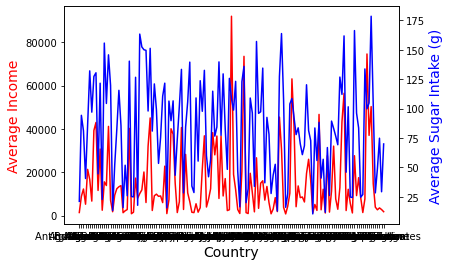

In [127]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(final_df2.AverageIncome, color="red")
# set x-axis label
ax.set_xlabel("Country",fontsize=14)
# set y-axis label
ax.set_ylabel("Average Income",color="red",fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(final_df2.AverageSugarIntake,color="blue")
ax2.set_ylabel("Average Sugar Intake (g)",color="blue",fontsize=14)
plt.show()

In [146]:
#Top 3 Countries + Canada for Sugar Intake
summary_df = final_df2.loc[["Malta","United States", "Switzerland", "Canada"]]
summary_df.head()

AverageIncome  AverageSugarIntake
Country                                         
Malta           26680.000000          157.090909
United States   50309.272727          178.545455
Switzerland     56452.090909          161.818182
Canada          40265.090909          140.363636

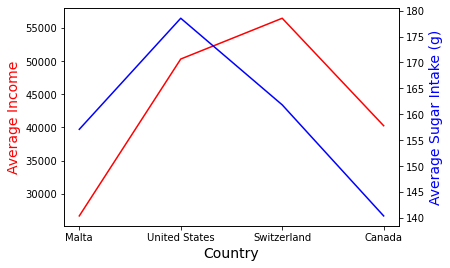

In [147]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(summary_df.AverageIncome, color="red")
# set x-axis label
ax.set_xlabel("Country",fontsize=14)
# set y-axis label
ax.set_ylabel("Average Income",color="red",fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(summary_df.AverageSugarIntake,color="blue")
ax2.set_ylabel("Average Sugar Intake (g)",color="blue",fontsize=14)
plt.show()

plt.scatter(country_income_df, country_sugar_df)
plt.title ('Average Sugar Income vs Average Sugar Intake (2002-2013)')
plt.xlabel('Mean Income (USD)')
plt.ylabel('Average Sugar Intake(g)')

plt.show()

In [115]:
#Calculate Correlation Coefficient
sts.pearsonr(final_df2.AverageIncome, final_df2.AverageSugarIntake)

(0.5393193330896457, 1.8178699674847945e-12)

In [116]:
#Calculate Linear Regression
model=sts.linregress(final_df2.AverageIncome, final_df2.AverageSugarIntake)
model

LinregressResult(slope=0.0013671029164492678, intercept=62.18491221509886, rvalue=0.5393193330896457, pvalue=1.8178699674847951e-12, stderr=0.00017727013492988477)

In [118]:
mslope = 0.0013671029164492678
bintercept = 62.18491221509886


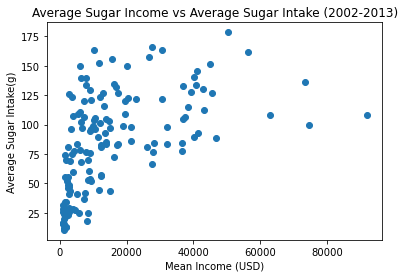

In [135]:
#Plot Linear Regression
y_values = country_income_df*mslope+bintercept
plt.scatter(country_income_df, country_sugar_df)
plt.title ('Average Sugar Income vs Average Sugar Intake (2002-2013)')
plt.xlabel('Mean Income (USD)')
plt.ylabel('Average Sugar Intake(g)')

plt.show()